# Exploratory Data Analysis Use Case

## Relevance of Mexican Immigration into the United States

December 19, 2022

Use Case: Pandas, Seaborn scatterplots and boxplots

@author: Oscar A. Trevizo

- Pandas: data format transformation, converting to int, transposing.
- Seaborn scatterplots with annotations, and boxplot outliers and comparisons.



# Relevance of Migration Between Mexico and the United States

How relevant is migration between Mexico and the United States? One would expect the answer to be "very relevant." We can begin to answer this question by exploring data from the United States Home Land Security Immigration Statistics. The data will allow to rank countries with respect to immigration statistics.



### _Python Libraries_

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import numpy.random as nr
from math import log, sqrt
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import zscore
import patsy
import warnings

%matplotlib inline


#  Data Source: United States Department of Home Land Security Immigration Statistics

Home Land Security publishes data that will allow us to explore the relevancy of migration between the US and Mexico. Immigration Statistics will provide data to compare Mexico with other countries relative to immigration into the US.

https://www.dhs.gov/immigration-statistics/naturalizations

U.S. Naturalizations 2021 Data Tables
https://www.dhs.gov/sites/default/files/2022-09/2022_0624_plcy_naturalizations_fy2021_tables.zip

Good background from:
https://www.dhs.gov/sites/default/files/2022-07/2022_0624_plcy_naturalizations_fy2021.pdf

- The dataset provides the number of US naturalization by country of origin from 2012 to 2021. 



## _Load the data_

In [2]:
# From xls to csv without extra headers and unnecessary rows at the bottom of the file.
# https://www.dhs.gov/sites/default/files/2022-09/2022_0624_plcy_naturalizations_fy2021_tables.zip
dhs_nat_ctry_fy2021 = pd.read_csv('data/fy2021_table21d_us_naturalizations_country.csv')

## _Clean the data_

In [3]:
##
# Clean up the dataset.
##

# Pandas read_csv() ported numbers as strings. We need to convert numerical strings to integers.
# The format of the values have commas (e.g. 1,234). Remove the commas.
dhs_nat_ctry_fy2021.loc[:,'2012':'2021'] = dhs_nat_ctry_fy2021.loc[:,'2012':'2021'].replace('[,]', '', regex=True)
# Some values had a dash '-'. Convert dashes to zeros.
dhs_nat_ctry_fy2021.loc[:,'2012':'2021'] = dhs_nat_ctry_fy2021.loc[:,'2012':'2021'].replace('[-]', '0', regex=True)
# Make sure we only have numbers. If we don't have numbers, convert to NaN and then drop all NaN entries.
dhs_nat_ctry_fy2021.loc[:,'2012':'2021'] = dhs_nat_ctry_fy2021.loc[:,'2012':'2021'].replace('[^0-9]', np.NaN,regex=True)
dhs_nat_ctry_fy2021.dropna(inplace=True)

# Now change the numberical strings to integer. Us the dictionary approach.
dtypes_dict = {'Country': str,
               '2012' : int,
               '2013' : int,
               '2014' : int,
               '2015' : int,
               '2016' : int,
               '2017' : int,
               '2018' : int,
               '2019' : int,
               '2020' : int,
               '2021' : int}
dhs_ctry_df = dhs_nat_ctry_fy2021.astype(dtypes_dict)

# Sort it by countries with largest number of naturalizations.
# First create a Totals column with the sum of years, sort, and then remove the Totals column.
dhs_ctry_df['Total'] = dhs_ctry_df.loc[:,'2012':'2021'].sum(axis=1)
dhs_ctry_df = dhs_ctry_df.sort_values(by=['Total'], ascending=False)
dhs_ctry_df = dhs_ctry_df.drop(['Total'], axis=1)
dhs_ctry_df.head()

,Country,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
118,Mexico,102181,99385,94889,105958,103550,118569,132074,122305,84090,113269
84,India,42928,49897,37854,42213,46188,50830,52228,64638,48111,57043
143,Philippines,44958,43489,34591,40815,41285,36830,38836,43675,33422,48478
40,"China, People's Republic",31868,35387,30284,31241,35794,37683,39617,39492,26111,29227
47,Cuba,31244,30482,24092,25770,32101,25964,32111,36253,31371,47919


# Exploratory Data Analysis 


The following sections provide an Exploratory Data Analysis (EDA) to determine the relevance of the migration between the United States and Mexico. 

## _Scatterplot: US naturalizations vs countries for years 2012 to 2021_

The scatterplot shows datapoints for each country over the years 2012 to 2022. 


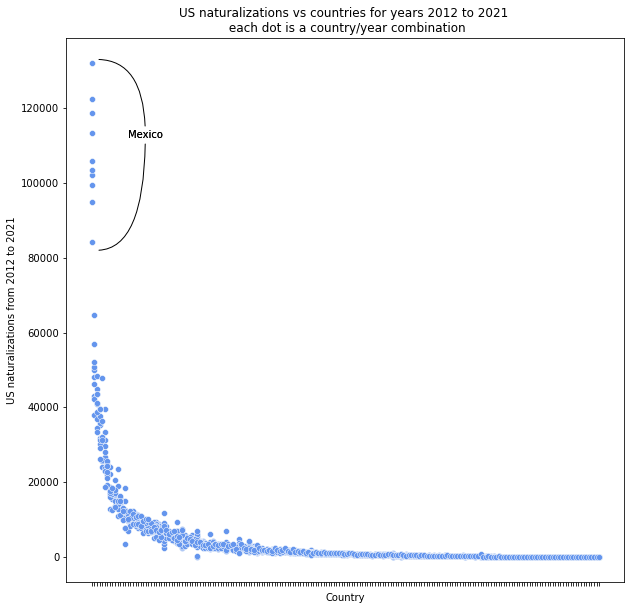

In [4]:
# Now let's create a line chart for US naturalizations.
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(2012, 2022):
    ax = sns.scatterplot(x='Country', y=str(i), data=dhs_ctry_df, color='cornflowerblue', legend=False)
ax.set(xticklabels=[])
ax.set_ylabel('US naturalizations from 2012 to 2021')
ax.set_title('US naturalizations vs countries for years 2012 to 2021 \n each dot is a country/year combination')

# Annotations
plt.annotate('Mexico', xy=('Philippines', 133000), xytext=('Peru', 112000),
#             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=90,angleB=0"));
            arrowprops=dict(arrowstyle="-", connectionstyle="angle3,angleA=90,angleB=0"));

plt.annotate('Mexico', xy=('Philippines', 82000), xytext=('Peru', 112000),
            arrowprops=dict(arrowstyle="-", connectionstyle="angle3,angleA=90,angleB=0"));

plt.show()

### Scatterplot takeaways:

>
> The plot shows:
>
> - There is a very big difference in number of US naturalizations from to to bottom.
>
> - There is a very steep decline indicating that the difference between the top countries descend very quickly.
>
> - Mexico shows up on the top, consistently each year. 
>
> - I had expected Mexico to be very relevant. I wasn't expecting such large different between Mexico and the next country in line.
>
> - The data may change if we were to group countries by region (e.g. Americas, Asia, Europe, etc.). For now, I will continue my focus on Mexico in this study and will come back to test the data from a regional basis.

## _Boxplot 1: Naturalization by year_

Here, the boxplot may not seem to be very suitable. However, it will show a very interesting aspect of our data. There is a very significant outlier, Mexico.

For that reason, to see the outlier, the boxplot is quite interesting.

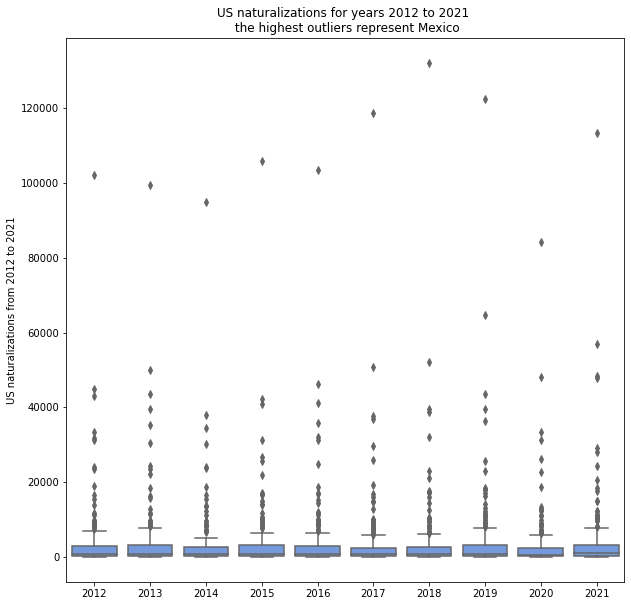

In [5]:
# Now let's create a boxplot for US naturalizations.
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(data=dhs_ctry_df, color='cornflowerblue')
ax.set_title('US naturalizations for years 2012 to 2021 \n the highest outliers represent Mexico')
ax.set_ylabel('US naturalizations from 2012 to 2021')

plt.show()

### Boxplot 1 takeaway
>
> - The first boxplot indicates that we have an outlier that sets far apart from the rest of the data. 
>
> - That outlier is Mexico. 
>

To have another angle of appreciation on the significance of Mexico on US immigration, a transpose on the dataset will allow us to view boxplots on a country-by-country basis.

## _Transpose the DataFrame_

In [6]:
dhs_ctry_T = dhs_ctry_df.transpose()
# Promoting the 1st row to header, tip from 
# https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row
dhs_ctry_T = dhs_ctry_T.rename(columns=dhs_ctry_T.iloc[0]).drop(dhs_ctry_T.index[0])

# Nex, rename some of the long country names to have a better fit in the boxplot.
dhs_ctry_T.rename(columns={"China, People's Republic": "China", 
                           "Dominican Republic": "DR",
                          "El Salvador": "Salvador"}, inplace=True)
# dhs_ctry_T

### _Boxplot 2: Naturalization by top-10 country_

This boxplot chart focuses on the top 10 countries. It gives us further appreciation for the magnitude in the difference between US naturalization from Mexico versus the rest of the countries.

The whiskers and quartiles are based on years 2012 to 2021.

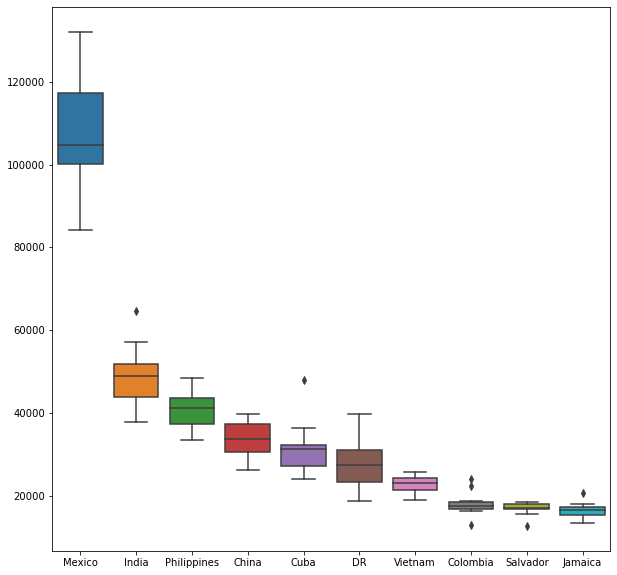

In [7]:
# Now let's create another boxplot for US naturalizations... Countries on x-axis, top 10 countries
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(data=dhs_ctry_T.loc[:,'Mexico':'Jamaica'])
plt.show()

### Boxplot 2 takeaways
>
> - Mexico produces more US naturalization than any other country,  ranking on top of the list.
>
> - The boxplot shows Mexico as a faraway outlier on top.
>
> - And Mexico produce two time more US naturalizations than the next country in line, India.
>
> - There is a consistent proportion in the US naturalization numbers by country. One possible explanation is these numbers are determined by policies.
>
> - Bottom line is, Mexico is very relevant to the United States relative to immigration as indicated by these charts.


# References 
1. United States Department of Home Land Security - (accessed Oct. 2, 2022) https://www.dhs.gov/immigration-statistics/naturalizations
1. United States Department of Home Land Security - U.S. Naturalizations 2021 Data Tables (accessed Oct. 2, 2022) https://www.dhs.gov/sites/default/files/2022-09/2022_0624_plcy_naturalizations_fy2021_tables.zip
1. United States Department of Home Land Security - Good background from: (accessed Oct. 2, 2022) https://www.dhs.gov/sites/default/files/2022-07/2022_0624_plcy_naturalizations_fy2021.pdf
1. Pandas documentation. (accessed Sep. 20, 2022) https://pandas.pydata.org/docs/user_guide/index.html
1. Seaborn documentation (accessed Sep. 12, 2022) https://seaborn.pydata.org/
1. matplotlib documentation (accessed Sep. 12, 2022) https://matplotlib.org/